In [58]:
import tensorflow as tf
import h5py
import numpy as np
from tensorflow import keras
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [59]:
h1 = h5py.File('SVHN_single_grey1.h5','r')

In [60]:
X_train = h1['X_train'][:]
y_train1 = h1['y_train'][:]
X_test = h1['X_test'][:]
y_test1 = h1['y_test'][:]



In [61]:
h1.close()

In [62]:
print(X_train.shape)
print(y_train1.shape)
print(X_test.shape)
print(y_test1.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [63]:
y_train = tf.keras.utils.to_categorical(y_train1,num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test1,num_classes = 10)

In [64]:
# Initialize and Build the model
model = tf.keras.models.Sequential()


In [65]:
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

In [66]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [67]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [68]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

In [69]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [70]:
#Add 5th hidden layer
model.add(tf.keras.layers.Dense(15, activation='relu'))

In [71]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [72]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_14 (Dense)             (None, 200)               205000    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_16 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_18 (Dense)             (None, 15)               

## Train the model

In [74]:
history=model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=30,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 67us/sample - loss: 1.7604 - accuracy: 0.3824 - val_loss: 1.2708 - val_accuracy: 0.5918
Epoch 2/30
42000/42000 [==============================] - 2s 59us/sample - loss: 1.1389 - accuracy: 0.6346 - val_loss: 1.1212 - val_accuracy: 0.6569
Epoch 3/30
42000/42000 [==============================] - 3s 61us/sample - loss: 0.9619 - accuracy: 0.6920 - val_loss: 0.9218 - val_accuracy: 0.7086
Epoch 4/30
42000/42000 [==============================] - 2s 59us/sample - loss: 0.8629 - accuracy: 0.7290 - val_loss: 0.8714 - val_accuracy: 0.7429
Epoch 5/30
42000/42000 [==============================] - 3s 61us/sample - loss: 0.8070 - accuracy: 0.7448 - val_loss: 0.7498 - val_accuracy: 0.7695
Epoch 6/30
42000/42000 [==============================] - 3s 61us/sample - loss: 0.7517 - accuracy: 0.7621 - val_loss: 0.7385 - val_accuracy: 0.7721
Epoch 7/30
42000/42000 [==============================] 

model predicted accuracy : 0.84716666


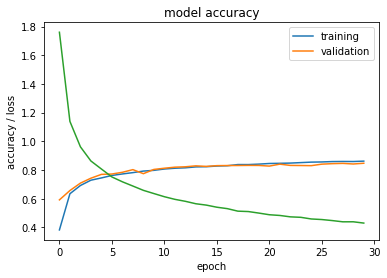

In [75]:
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)
print("model predicted accuracy :" , accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [76]:
y_pred = model.predict(X_test)
print(y_pred)

[[7.24645332e-02 5.68639636e-01 3.70966531e-02 ... 6.19234256e-02
  5.63792475e-02 3.31371240e-02]
 [2.21273376e-06 1.54164227e-04 1.21842055e-02 ... 9.87402260e-01
  2.67478063e-05 8.85320187e-05]
 [1.35487289e-06 3.19947071e-06 9.99778569e-01 ... 4.12284753e-05
  5.54756989e-05 1.60529216e-05]
 ...
 [4.53790290e-06 6.07215916e-04 6.14875353e-06 ... 9.98994052e-01
  1.07046417e-05 1.34045331e-05]
 [4.82437015e-02 1.18665909e-02 1.76833440e-02 ... 6.75399462e-03
  3.80126238e-02 7.13090599e-01]
 [1.13975384e-05 1.14029635e-05 9.98953700e-01 ... 6.53307303e-04
  4.09549248e-05 1.44401711e-04]]


In [77]:
print(X_test.shape)
in_data = np.expand_dims(X_test[1],axis = 0)
print(in_data.shape)


(18000, 32, 32)
(1, 32, 32)


In [78]:
y_test1[1]

7

In [79]:
prediction = model.predict(in_data)
print(prediction)

[[2.2127299e-06 1.5416379e-04 1.2184184e-02 7.5797419e-05 4.0953640e-07
  4.6841549e-05 1.8855977e-05 9.8740238e-01 2.6747708e-05 8.8531691e-05]]


In [80]:
prediction.shape

(1, 10)

Predicted Num: 7
Original Num: 7


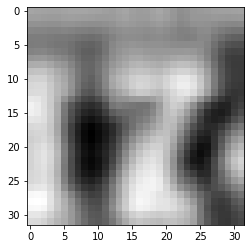

In [81]:
plt.imshow(X_test[1], cmap = 'gray')
predicted_num = np.argmax(prediction)

print('Predicted Num:',predicted_num)
print('Original Num:', y_test1[1])